In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "veneto"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.25
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,64.29
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.97
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.70
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2021-01-11T17:00:00,5,Veneto,2582,358,2940,84600,87540,-1273,1715,...,38.0,11001.0,2784.0,-1273.0,12.18,3.36,15.59,61.60,0.85,-1.43
322,2021-01-12T17:00:00,5,Veneto,2596,359,2955,81770,84725,-2815,2134,...,166.0,15867.0,4032.0,-2830.0,12.15,3.49,13.45,52.93,0.28,-3.22
323,2021-01-13T17:00:00,5,Veneto,2551,336,2887,79083,81970,-2755,1884,...,91.0,19063.0,3747.0,-2687.0,11.64,3.52,9.88,50.28,-6.41,-3.25
324,2021-01-14T17:00:00,5,Veneto,2447,328,2775,77050,79825,-2145,2076,...,101.0,14904.0,4329.0,-2033.0,11.82,3.48,13.93,47.96,-2.38,-2.62


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1079
Nuovi tamponi: 57842.0
Percentuale nuovi positivi/nuovi tamponi: 1.9 %
Nuovi guariti: 5477.0
Nuovi deceduti: 74.0
Variazione positivi ricoverati con sintomi: -61.0
Variazione positivi in terapia intensiva: -1.0
Variazione positivi in isolamento dimiciliare: -4410.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-16T17:00:00,5,Veneto,1985,252,2237,60461,62698,1192,1966,...,22.0,9357.0,3542.0,1130.0,11.27,3.57,21.01,55.51,4.56,1.94
1,2020-11-17T17:00:00,5,Veneto,1980,266,2246,60825,63071,373,3124,...,100.0,18539.0,7392.0,364.0,11.84,3.56,16.85,42.26,5.56,0.59
2,2020-11-18T17:00:00,5,Veneto,2079,274,2353,61953,64306,1235,2972,...,52.0,16921.0,5420.0,1128.0,11.64,3.66,17.56,54.83,3.01,1.96
3,2020-11-19T17:00:00,5,Veneto,2121,279,2400,64182,66582,2276,3753,...,38.0,17420.0,5755.0,2229.0,11.62,3.60,21.54,65.21,1.82,3.54
4,2020-11-20T17:00:00,5,Veneto,2170,267,2437,66250,68687,2105,3468,...,66.0,15966.0,5186.0,2068.0,10.96,3.55,21.72,66.87,-4.30,3.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-11T17:00:00,5,Veneto,2582,358,2940,84600,87540,-1273,1715,...,38.0,11001.0,2784.0,-1273.0,12.18,3.36,15.59,61.60,0.85,-1.43
57,2021-01-12T17:00:00,5,Veneto,2596,359,2955,81770,84725,-2815,2134,...,166.0,15867.0,4032.0,-2830.0,12.15,3.49,13.45,52.93,0.28,-3.22
58,2021-01-13T17:00:00,5,Veneto,2551,336,2887,79083,81970,-2755,1884,...,91.0,19063.0,3747.0,-2687.0,11.64,3.52,9.88,50.28,-6.41,-3.25
59,2021-01-14T17:00:00,5,Veneto,2447,328,2775,77050,79825,-2145,2076,...,101.0,14904.0,4329.0,-2033.0,11.82,3.48,13.93,47.96,-2.38,-2.62


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

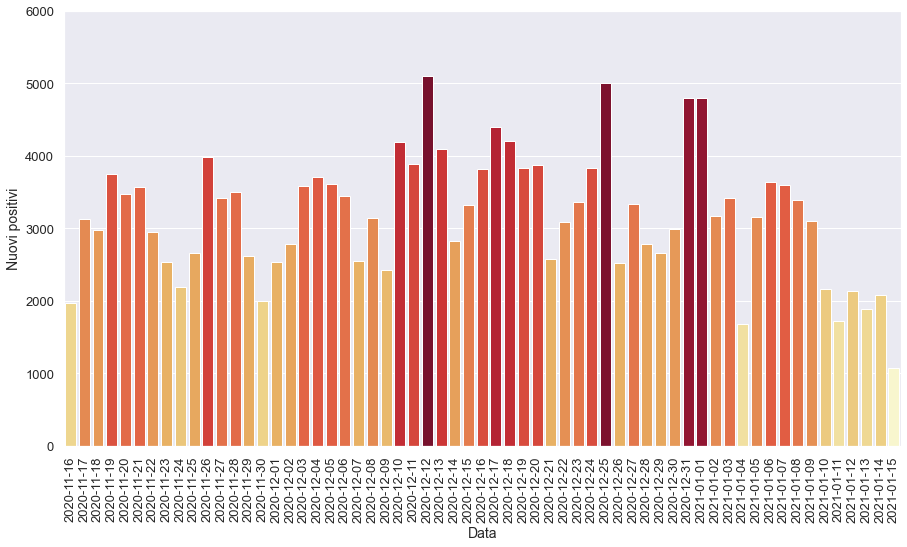

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

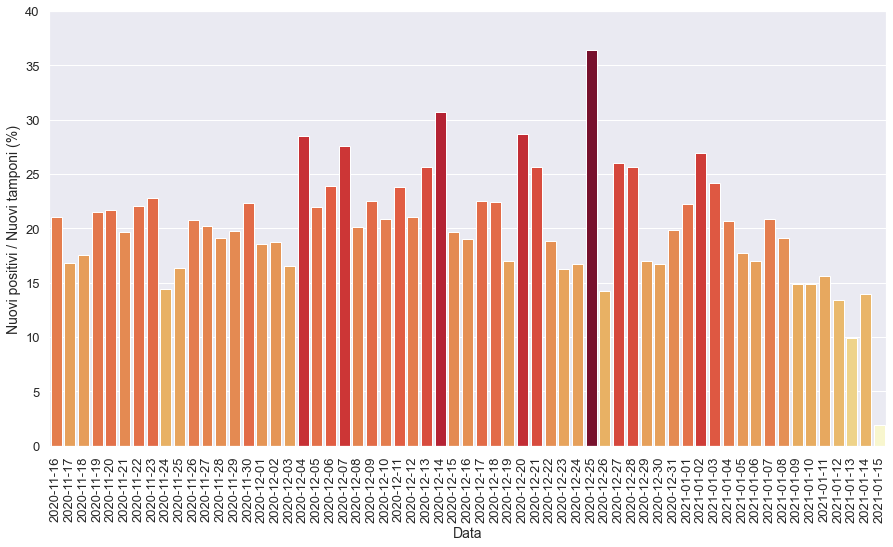

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

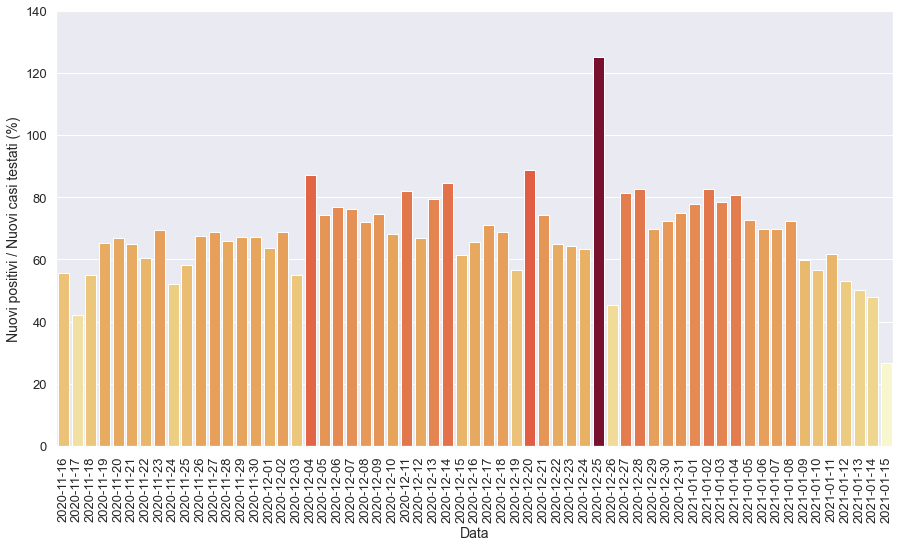

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

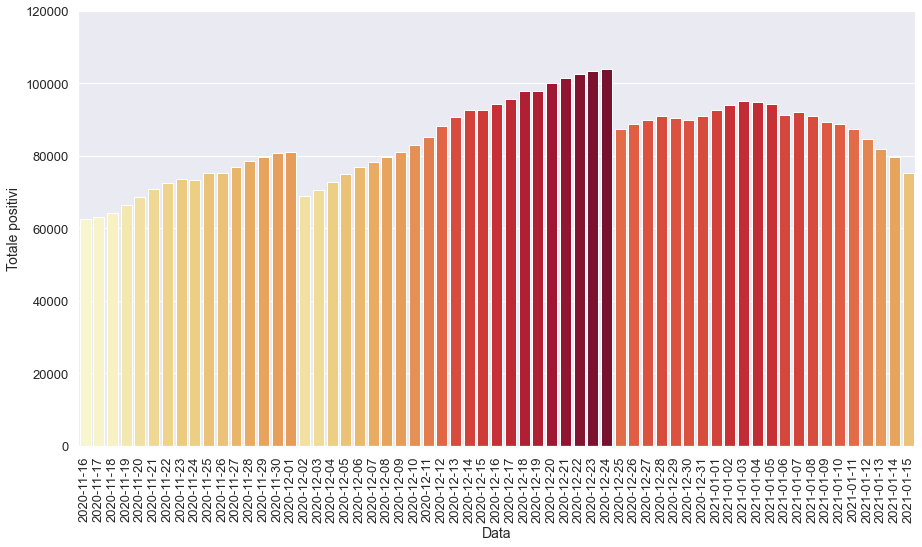

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

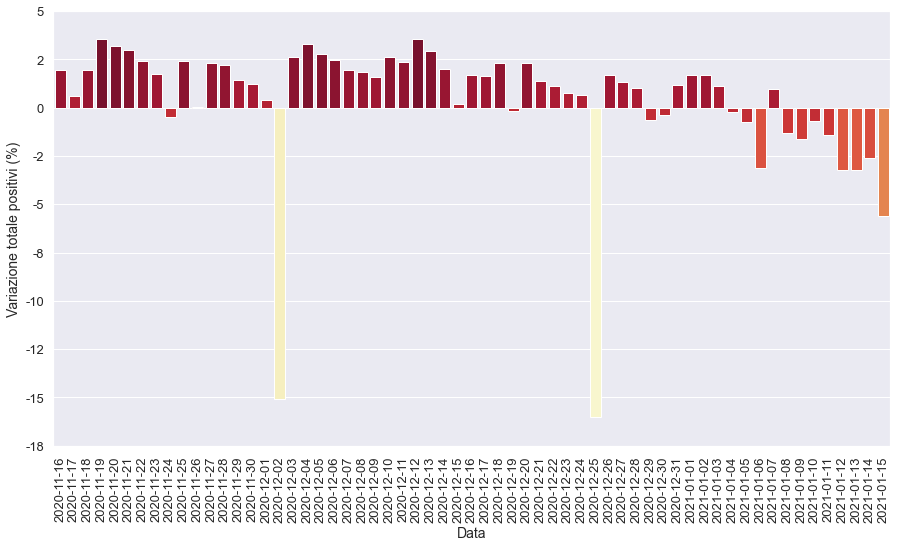

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

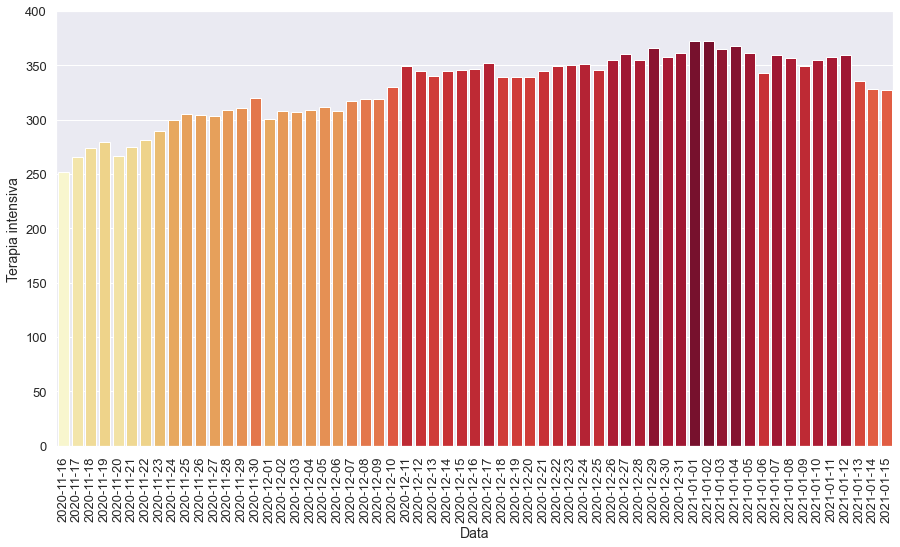

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

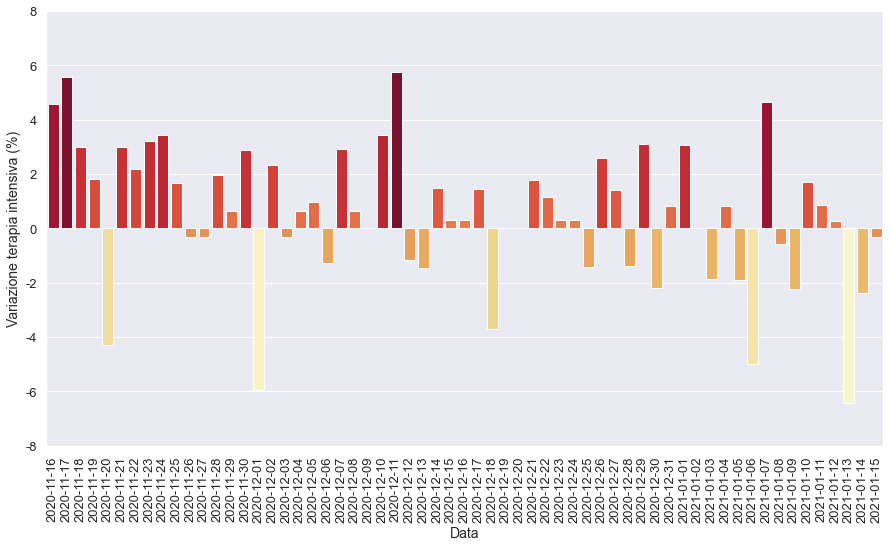

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

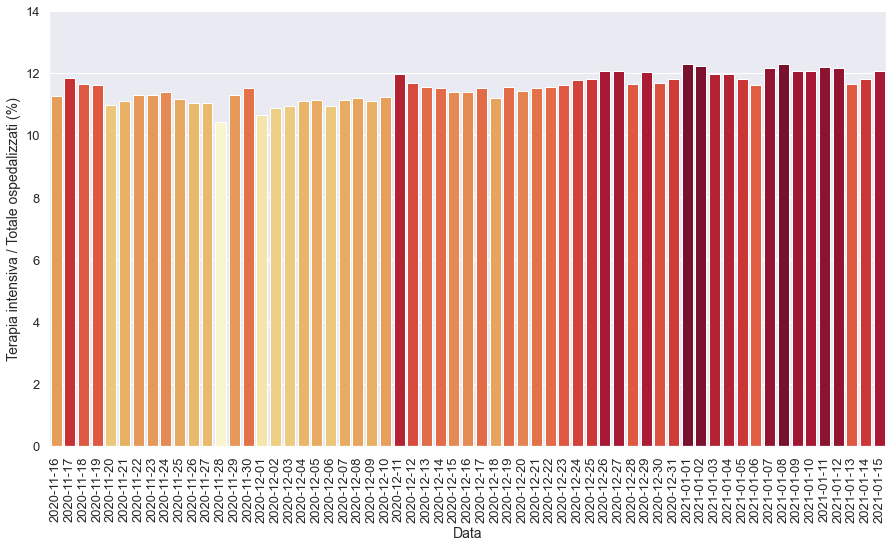

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

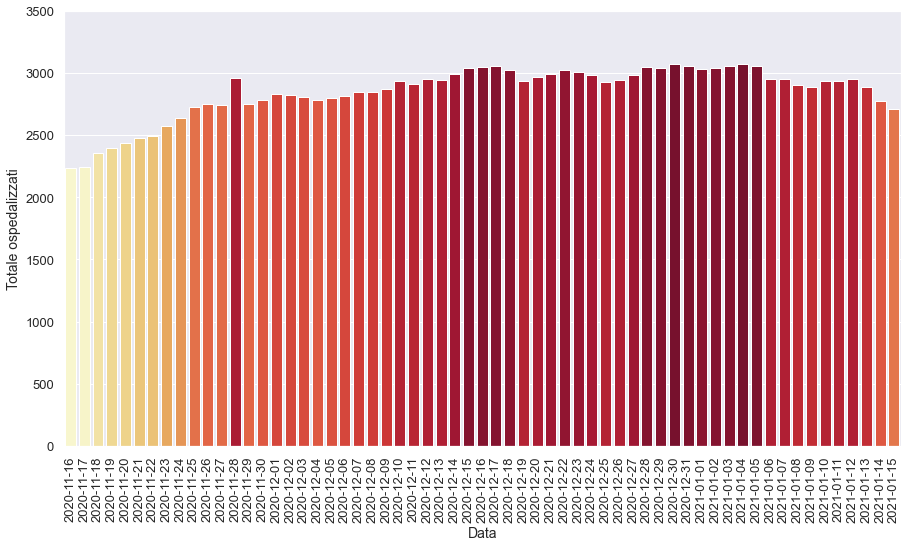

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

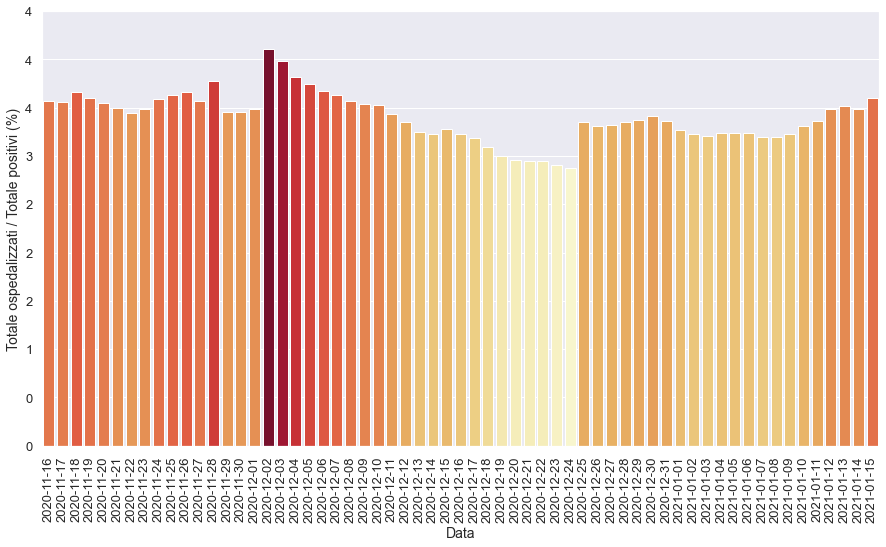

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

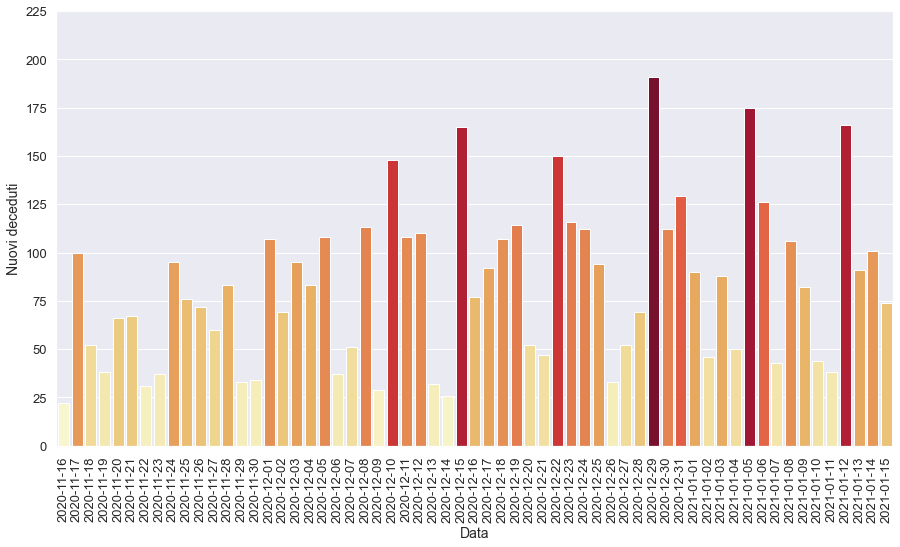

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

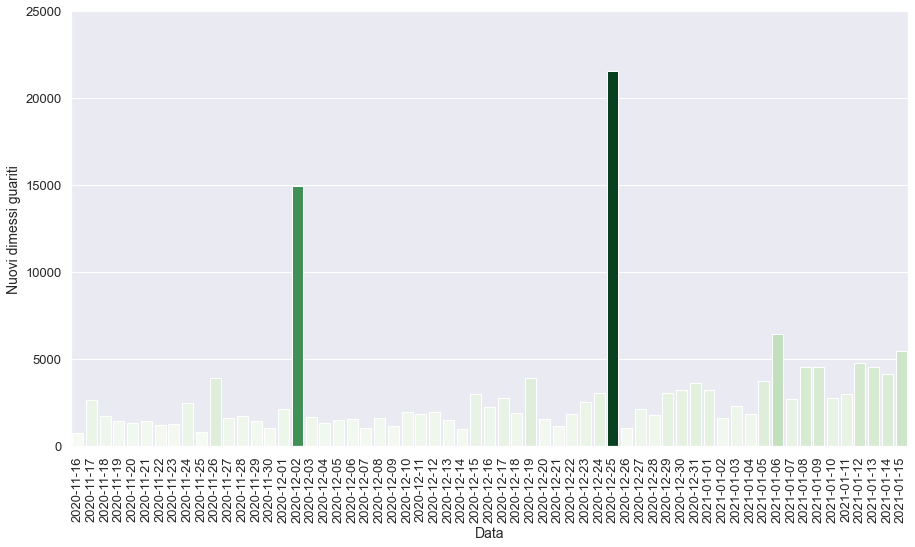

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-16T17:00:00,5,Veneto,2698,347,3045,91180,94225,1535,3817,...,77.0,20103.0,5823.0,1530.0,11.40,3.23,18.99,65.55,0.29,1.66
1,2020-12-17T17:00:00,5,Veneto,2701,352,3053,92726,95779,1554,4402,...,92.0,19576.0,6192.0,1546.0,11.53,3.19,22.49,71.09,1.44,1.65
2,2020-12-18T17:00:00,5,Veneto,2687,339,3026,94988,98014,2235,4211,...,107.0,18801.0,6110.0,2262.0,11.20,3.09,22.40,68.92,-3.69,2.33
3,2020-12-19T17:00:00,5,Veneto,2596,339,2935,94881,97816,-198,3834,...,114.0,22554.0,6792.0,-107.0,11.55,3.00,17.00,56.45,0.00,-0.20
4,2020-12-20T17:00:00,5,Veneto,2627,339,2966,97123,100089,2273,3869,...,52.0,13503.0,4355.0,2242.0,11.43,2.96,28.65,88.84,0.00,2.32
5,2020-12-21T17:00:00,5,Veneto,2649,345,2994,98480,101474,1385,2583,...,47.0,10073.0,3472.0,1357.0,11.52,2.95,25.64,74.40,1.77,1.38
6,2020-12-22T17:00:00,5,Veneto,2672,349,3021,99557,102578,1104,3082,...,150.0,16322.0,4751.0,1077.0,11.55,2.95,18.88,64.87,1.16,1.09
7,2020-12-23T17:00:00,5,Veneto,2660,350,3010,100316,103326,748,3357,...,116.0,20593.0,5223.0,759.0,11.63,2.91,16.30,64.27,0.29,0.73
8,2020-12-24T17:00:00,5,Veneto,2630,351,2981,101041,104022,696,3837,...,112.0,22914.0,6068.0,725.0,11.77,2.87,16.75,63.23,0.29,0.67
9,2020-12-25T17:00:00,5,Veneto,2582,346,2928,84457,87385,-16637,5010,...,94.0,13776.0,3999.0,-16584.0,11.82,3.35,36.37,125.28,-1.42,-15.99


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

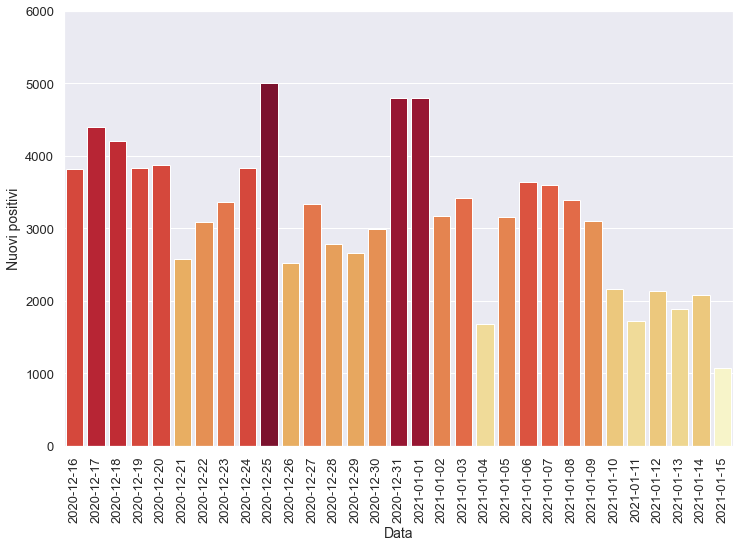

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

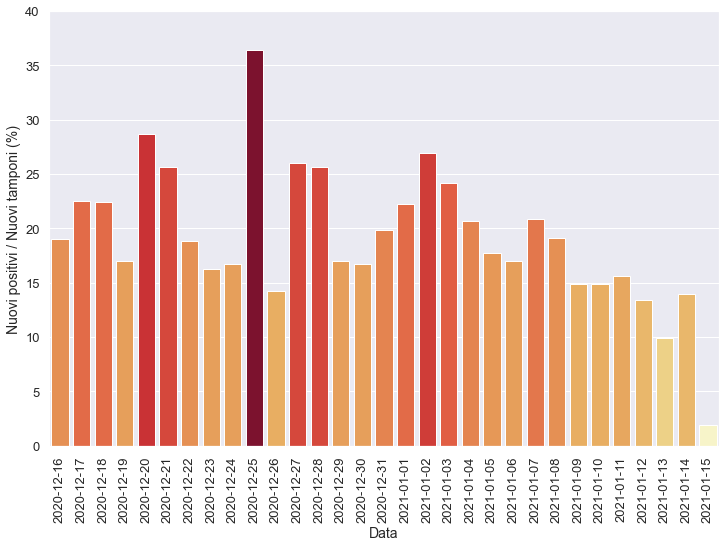

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

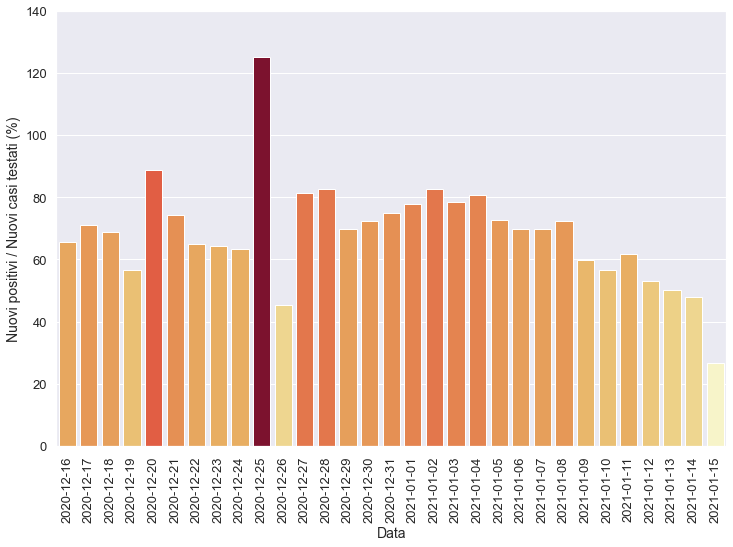

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

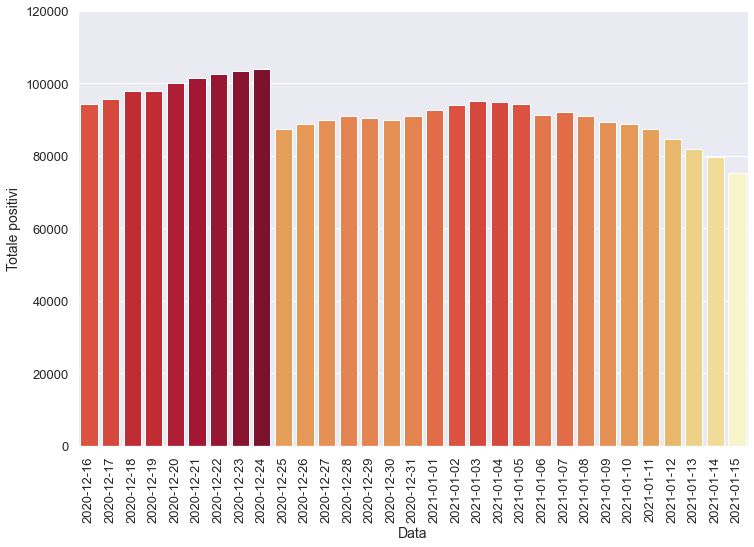

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

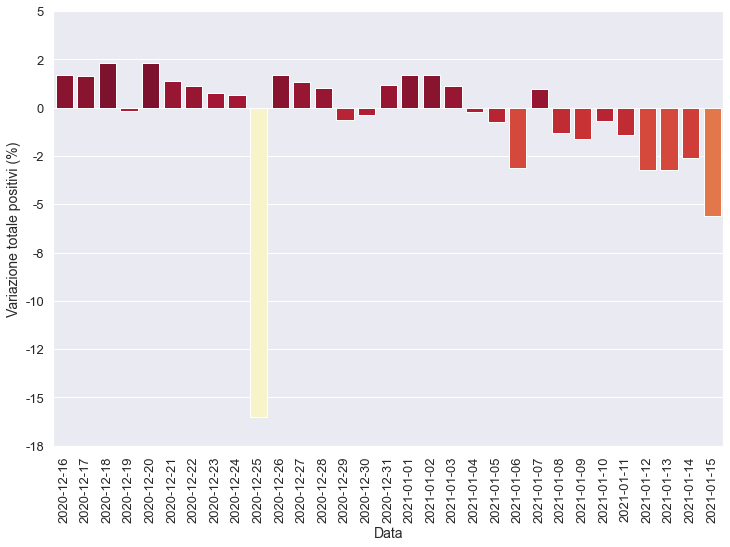

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

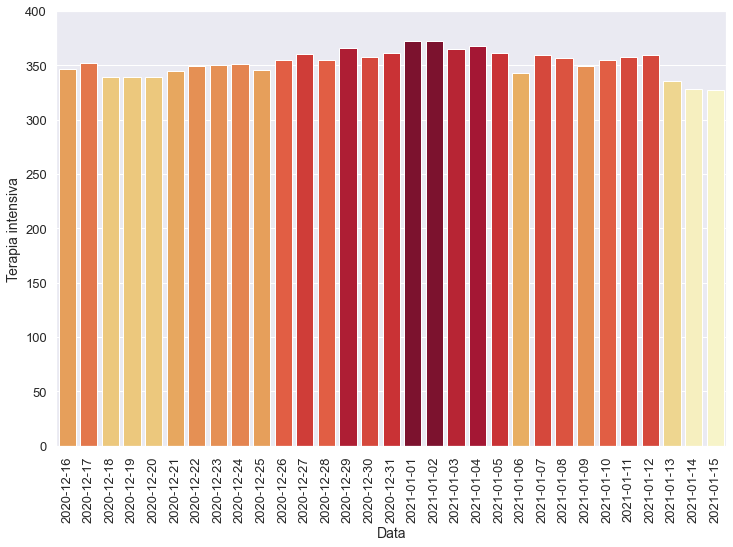

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

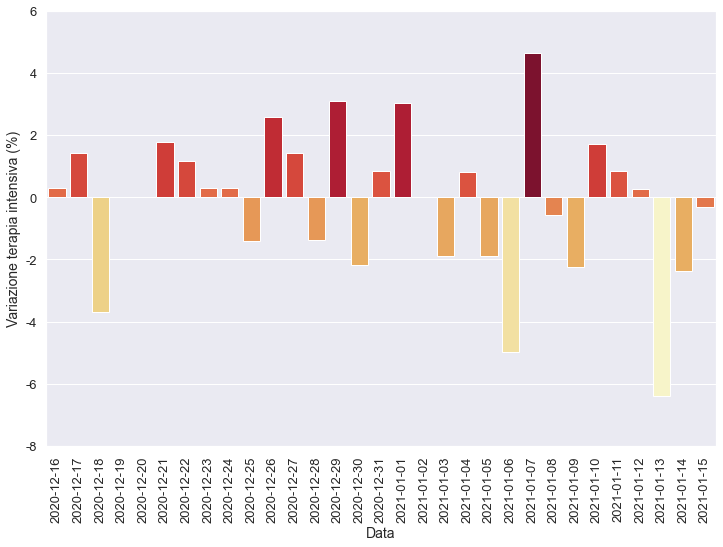

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

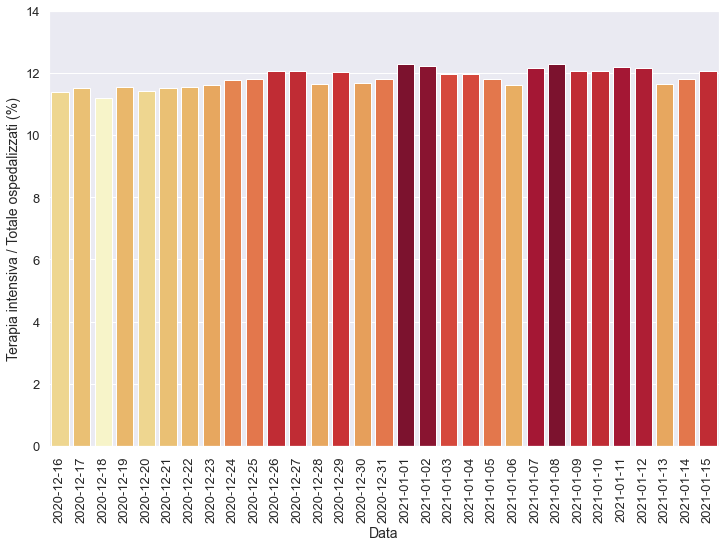

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

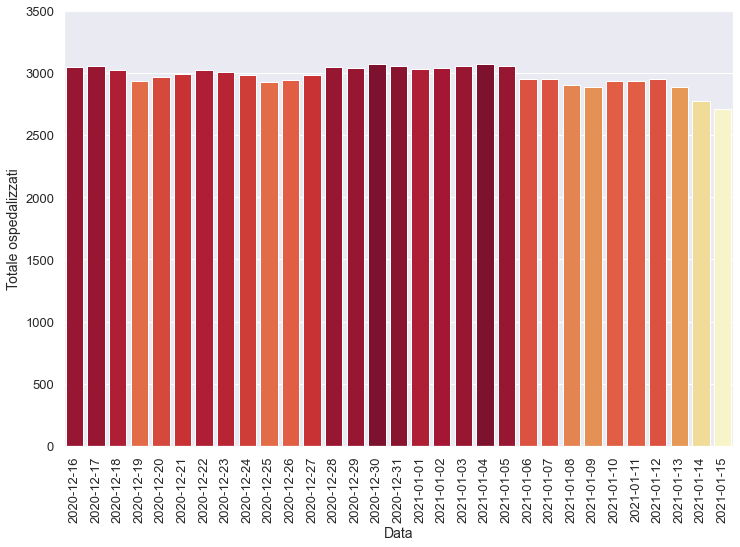

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

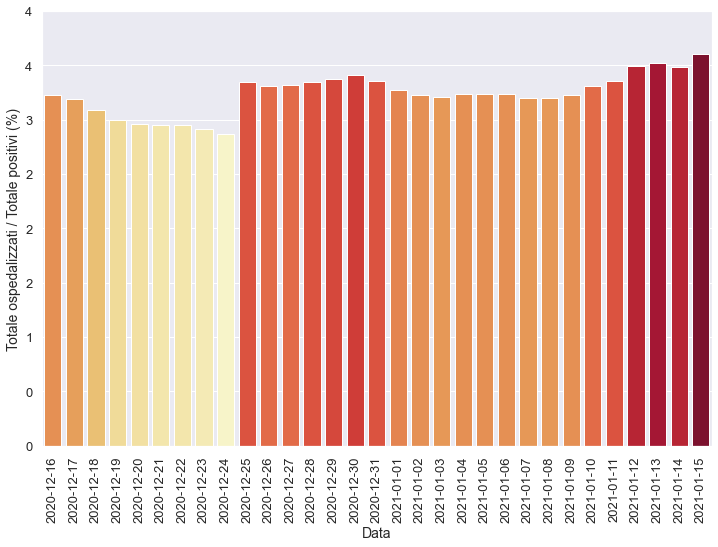

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

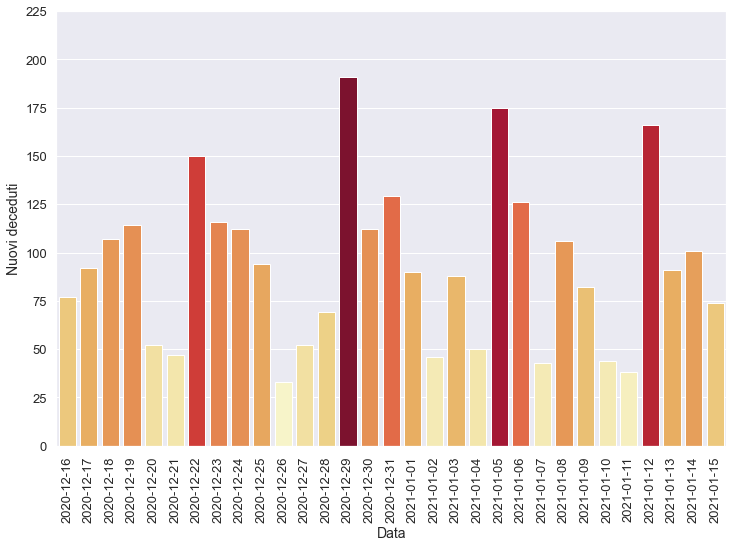

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

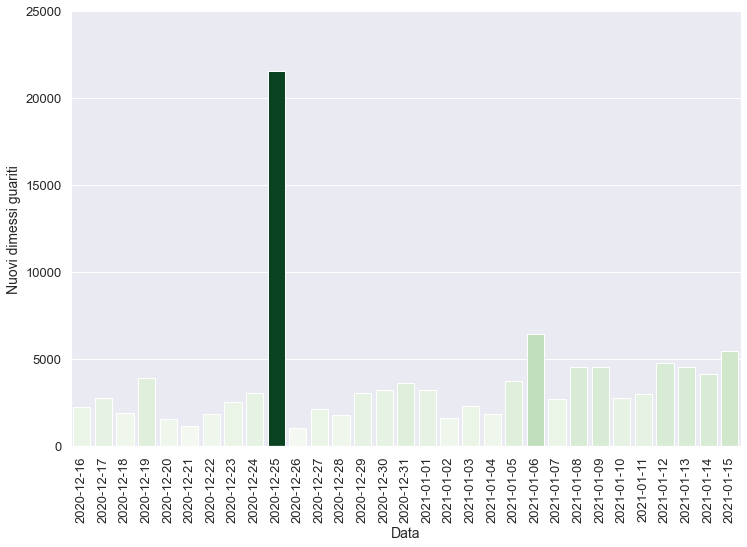

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-08T17:00:00,5,Veneto,2549,357,2906,88044,90950,-1226,3388,...,106.0,17722.0,4683.0,-1179.0,12.28,3.20,19.12,72.35,-0.56,-1.33
1,2021-01-09T17:00:00,5,Veneto,2540,349,2889,86562,89451,-1499,3100,...,82.0,20779.0,5188.0,-1482.0,12.08,3.23,14.92,59.75,-2.24,-1.65
2,2021-01-10T17:00:00,5,Veneto,2585,355,2940,85873,88813,-638,2167,...,44.0,14586.0,3820.0,-689.0,12.07,3.31,14.86,56.73,1.72,-0.71
3,2021-01-11T17:00:00,5,Veneto,2582,358,2940,84600,87540,-1273,1715,...,38.0,11001.0,2784.0,-1273.0,12.18,3.36,15.59,61.60,0.85,-1.43
4,2021-01-12T17:00:00,5,Veneto,2596,359,2955,81770,84725,-2815,2134,...,166.0,15867.0,4032.0,-2830.0,12.15,3.49,13.45,52.93,0.28,-3.22
5,2021-01-13T17:00:00,5,Veneto,2551,336,2887,79083,81970,-2755,1884,...,91.0,19063.0,3747.0,-2687.0,11.64,3.52,9.88,50.28,-6.41,-3.25
6,2021-01-14T17:00:00,5,Veneto,2447,328,2775,77050,79825,-2145,2076,...,101.0,14904.0,4329.0,-2033.0,11.82,3.48,13.93,47.96,-2.38,-2.62
7,2021-01-15T17:00:00,5,Veneto,2386,327,2713,72640,75353,-4472,1079,...,74.0,57842.0,4043.0,-4410.0,12.05,3.60,1.87,26.69,-0.30,-5.60


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

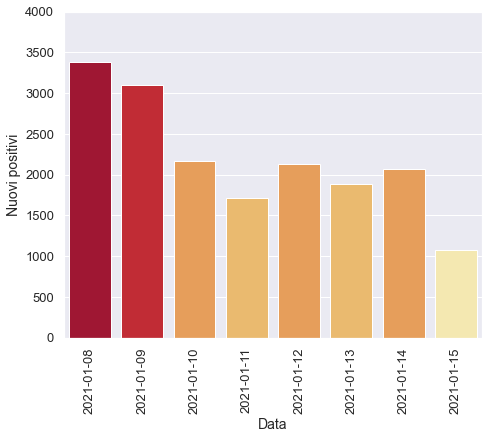

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

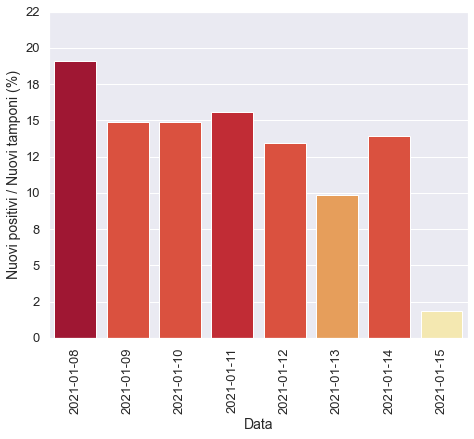

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

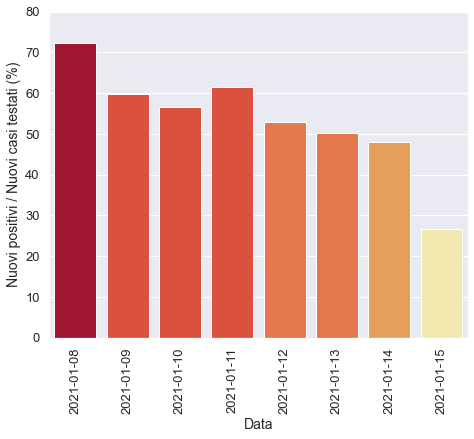

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

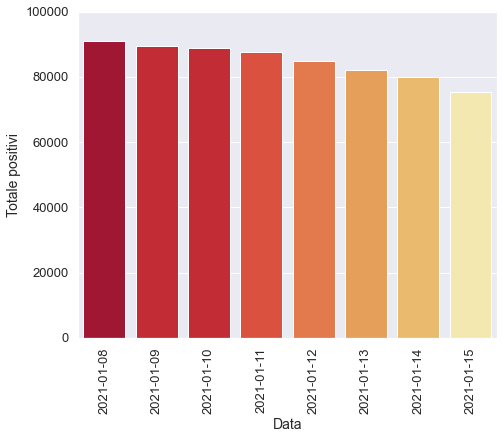

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

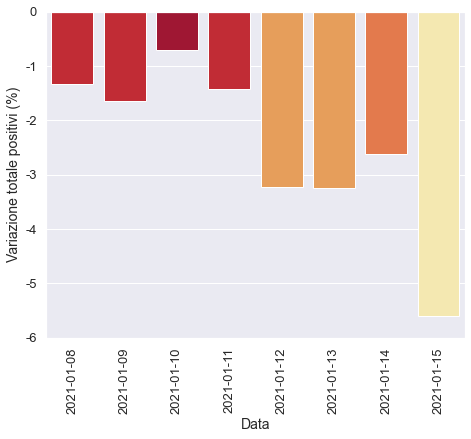

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

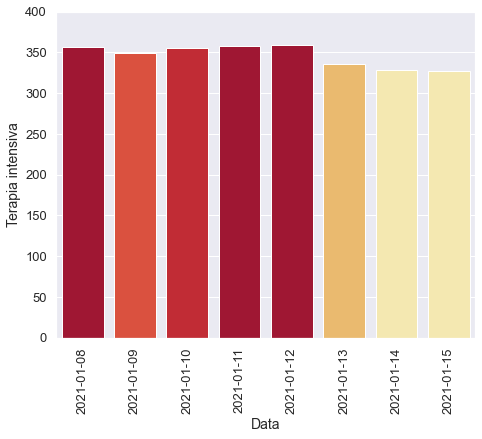

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

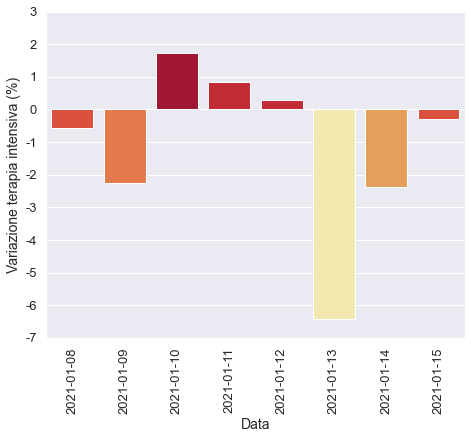

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

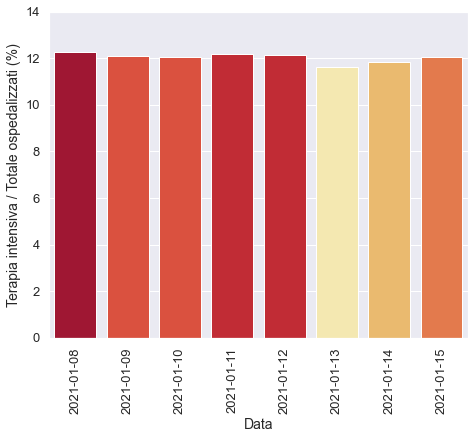

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

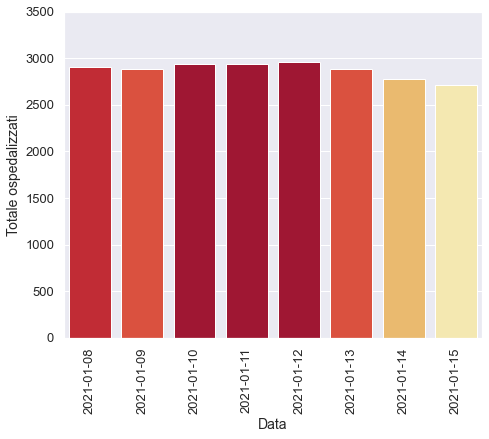

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

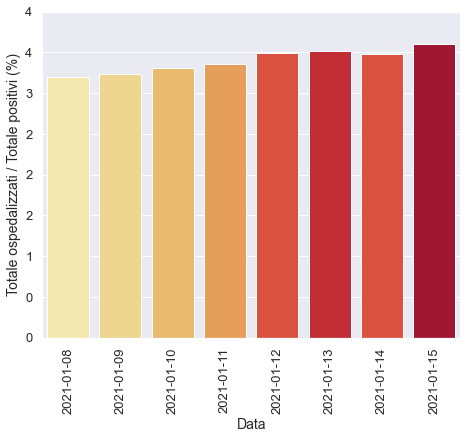

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

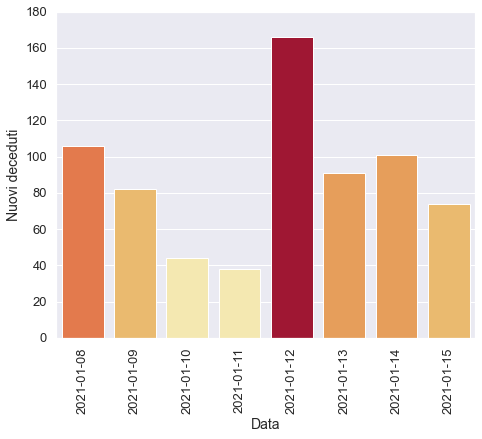

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

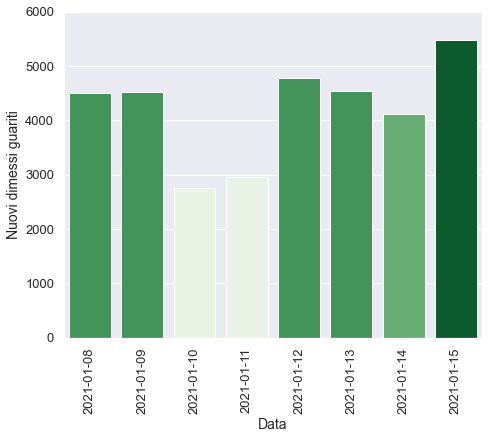

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)